## Setting the path for test images

In [1]:
graphene_path = './data_demo/Flakesearch_Graphene_20180214175340935_087.png'
RCE_path = './data_demo/RCEvase/RCEvase_1zn_MapON_ScanON_AeON_FuE_2_Delta_0001.png'
RCE_psi_path = './data_demo/RCEvase/RCEvase_1zn_MapON_ScanON_AeON_FuE_2_Psi_0001.png'

## Import libraries and modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from nanofilm.ndimage import imread
import numpy.ma as ma

from skimage.feature import canny



### Read map image and clean NaNs

In [3]:
def map_load_cleannans(image, fill_value=0, copy=False):
    #input diferent fill_value, like np.mean(image) or np.median(image)
    #overrides the values in input image. Returned image is only a masked array
    image = imread(image).T
    
    image = ma.fix_invalid(image,
                           copy=copy, 
                           fill_value=fill_value)
    return image

In [4]:
grapheneRaw = imread(graphene_path).T
grapheneZeros = map_load_cleannans(graphene_path)
grapheneMedian = map_load_cleannans(graphene_path, 
                                    fill_value=np.nanmedian(grapheneRaw))

###### We keep one image where NaNs are replaced by the median of the array in order to use it for some calculations, like the min and max, later on. Otherwise some calculations will not work if the NaNs are there or will be strongly biased by the zeros.

In [6]:
RCEtestRaw = imread(RCE_path).T
RCEtestZeros = map_load_cleannans(RCE_path)
RCEtestMedian = map_load_cleannans(RCE_path, 
                                    fill_value=np.nanmedian(RCEtestRaw))

In [7]:
RCEPsiRaw = imread(RCE_psi_path).T
RCEPsiZeros = map_load_cleannans(RCE_psi_path)
RCEPsiMedian = map_load_cleannans(RCE_psi_path, 
                                    fill_value=np.nanmedian(RCEPsiRaw))

### Retrieving min and max values of the image to set the display contrast

In [8]:
maxcontrast = np.max(grapheneMedian)
mincontrast = np.min(grapheneMedian)

All of the above can be packed in a single function which will return multiple items: all types of image variations plus the required variables, like maxcontras and mincontrast. Or maybe this can be built in a class...

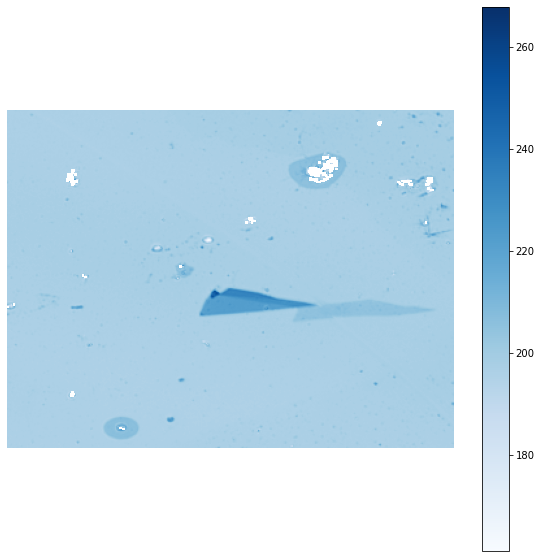

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10) )
ax.set_axis_off()
arrContrast = ax.imshow(grapheneZeros, 
                        vmin = mincontrast,
                        vmax = maxcontrast,
                        cmap = 'Blues')
cbar = plt.colorbar(arrContrast)
#cbar.ax.set_ylabel('$\Delta$ / °')

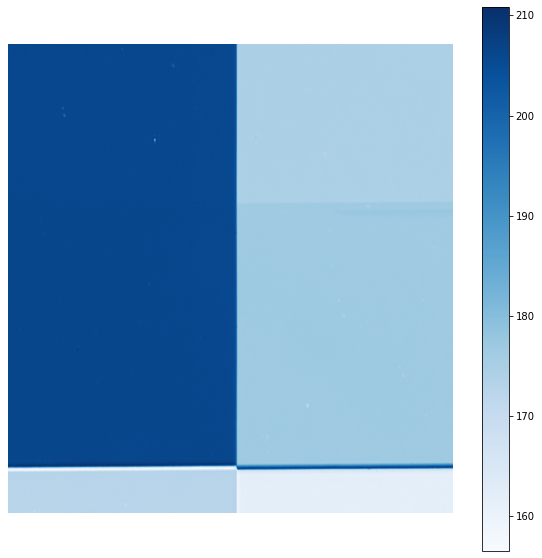

In [10]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_axis_off()
arrContrast = ax.imshow(RCEtestZeros, 
                        vmin = np.min(RCEtestMedian),
                        vmax = np.max(RCEtestMedian),
                        cmap = 'Blues')
cbar = plt.colorbar(arrContrast)
#cbar.ax.set_ylabel('$\Delta$ / °')

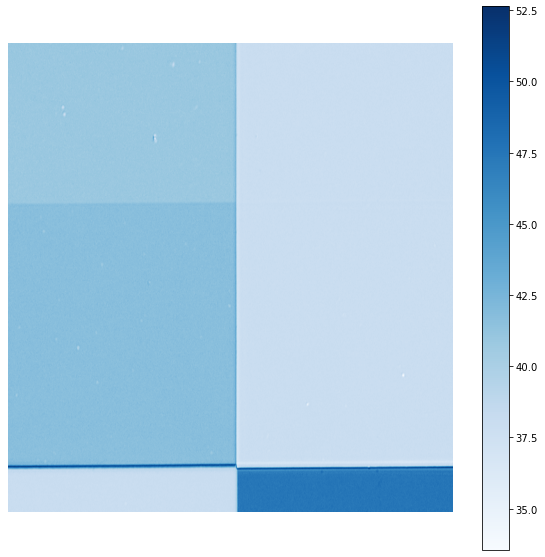

In [11]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.set_axis_off()
arrContrast = ax.imshow(RCEPsiZeros, 
                        vmin = np.min(RCEPsiMedian),
                        vmax = np.max(RCEPsiMedian),
                        cmap = 'Blues')
cbar = plt.colorbar(arrContrast)
#cbar.ax.set_ylabel('$\Delta$ / °')

# Testing Canny edge detector in unprocessed maps

In [13]:
from skimage.feature import canny

In [14]:
edgedGraphene = canny(grapheneZeros)
edgedDelta = canny(RCEtestZeros)
edgedPsi = canny(RCEPsiZeros)

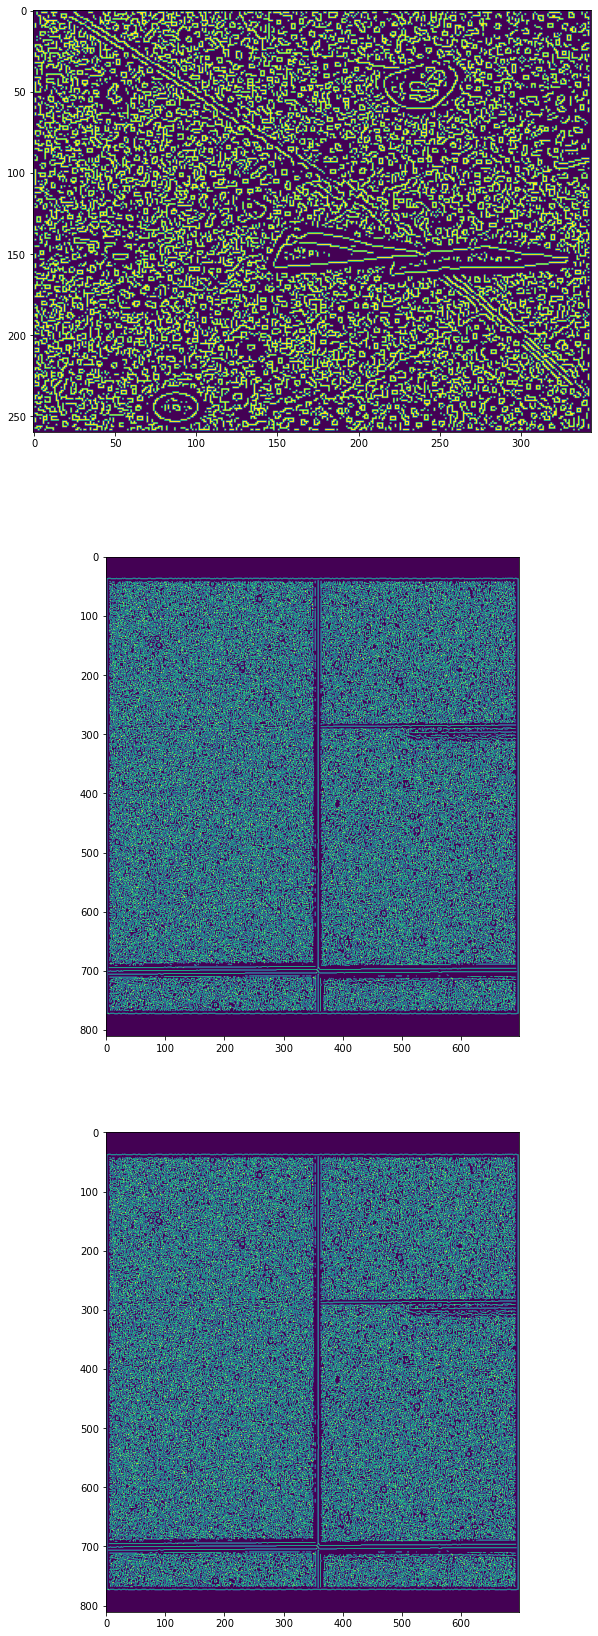

In [35]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(10,30))
ax1.imshow(edgedGraphene)
ax2.imshow(edgedDelta)
ax3.imshow(edgedDelta)

# Testing Canny edge detector in blurred maps

In [ ]:
blurredGraphene = canny(grapheneZeros)
blurredDelta = canny(RCEtestZeros)
blurredPsi = canny(RCEPsiZeros)

edgedGraphene = canny(blurredGraphene)
edgedDelta = canny(blurredDelta)
edgedPsi = canny(blurredPsi)